# Intro to Linear Regression

So what is linear regression? It's essentially trying to find a trend in the data. The result might look something like this:

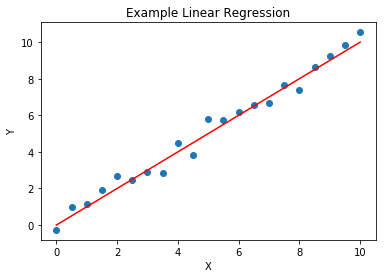

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

raw_inputs = np.linspace(0,10,21)
x = []
y = []
for val in raw_inputs:
    x.append(val)
    y.append(val + np.random.normal(0,0.4))
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)
plt.scatter(x,y)
plt.plot(raw_inputs,raw_inputs,'r')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Example Linear Regression");

In simple problems, it's really easy to do this, but in more complicated problems we'll want to set up some sort of 'automated process' for finding the line. Basically, we want the machine to do it in a smart way so that we don't have to just eye-ball it. So how do we do that? Let's take a look at a method called **"Ordinary Least Squares."**

In ordinary least squares we're trying to get a sense of how much we missed each point by when using our model, and then make a better choice next time. Let's start out by telling our model to guess a flat line at `y = 5`.

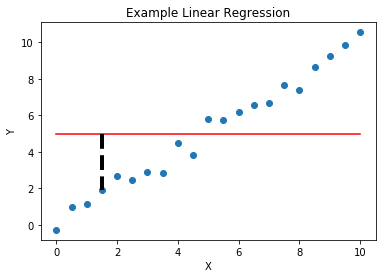

In [13]:
xpoint = x[3]
ypoint = y[3]
predictions = [5 for i in raw_inputs]
ypred = predictions[3]

plt.scatter(x,y)
plt.plot(raw_inputs,predictions,'r')
plt.plot([xpoint,xpoint],[ypred,ypoint],'k--',lw=4)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Example Linear Regression");

The black, dashed line here shows how much we missed that point by! Let's add up all the amounts we missed by. For **Ordinary Least Square** we do this by adding up the error squared. 

This punishes us for missing values by a lot and rewards us for finding lots of small errors. So let's break it down:

* Ordinary: We're not doing anything crazy, we're just using the regular errors (how much our model missed).
* Least: We're trying to find a result that minimizes our errors.
* Squares: We're using the square of the errors to optimize... really punishing us if we miss any values by a lot and rewarding us for errors < 1.

In [19]:
def get_error(true_y, predictions):
    error = 0
    for y, pred in zip(true_y,predictions):
        error += (y-pred)*(y-pred)
    return error

#zip = all columns
#For all entries of true_y and predited value, calculate the error adn sum the error

get_error(y,predictions)

array([194.43055425])

We can see right away that our model isn't very good, and that error sets the baseline for what we need to do better than. Let's try something a bit more reasonable, let's assume some form of `y = m*x + b` the classic formula for a line. Let's choose m = 0.5 and b = 0.

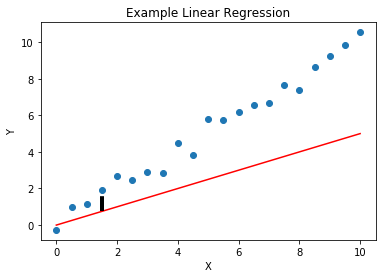

In [20]:
xpoint = x[3]
ypoint = y[3]
m = 0.5
b = 0.
predictions = [b+m*i for i in raw_inputs] # THIS LINE CHANGES
ypred = predictions[3]

plt.scatter(x,y)
plt.plot(raw_inputs,predictions,'r')
plt.plot([xpoint,xpoint],[ypred,ypoint],'k--',lw=4)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Example Linear Regression");

Hey, that looks better! What's the error look like? 

In [21]:
get_error(y,predictions)

array([194.43055425])

It's gone down a little bit! Nice. We're headed in the right direction. So why don't we just make a function out of it and see what we can do. Lets try making our line steeper over and over to find the best line (since we can see that's the right move).

The slope we found is: 0.9999999999999999
Our Error for this is:  [3.8689736]


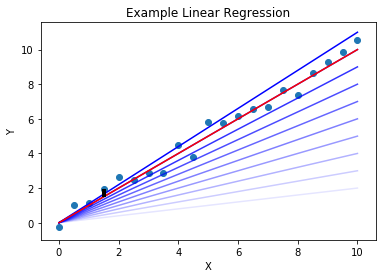

In [24]:
# Initialize the program so that we can start it!
prev_error = 10000
slope = 0.0

# Start with a line that's all 0's and get the error there.
predictions = [0+slope*i for i in raw_inputs]
current_error = get_error(y,predictions)

# Now we loop through and see if we're getting better or worse errors!
# If we get worse errors, we'll stop trying to go higher. This is an over-simplification
# but we're going to use it for demo purposes.
while current_error < prev_error:
    prev_error = current_error
    slope += 0.1
    predictions = [0+slope*i for i in raw_inputs]
    current_error = get_error(y,predictions)
    # Uncomment below to see all the lines being tried before we stop!
    plt.plot(raw_inputs,predictions,'b',alpha=slope-.1)
    
# Remove the last step since it made it worse.
slope -=0.1
predictions = [0+slope*i for i in raw_inputs]
current_error = get_error(y,predictions)
ypred = predictions[3]
    
# Now print our results
print("The slope we found is:", slope)
plt.scatter(x,y)
plt.plot(raw_inputs,predictions,'r')
plt.plot([xpoint,xpoint],[ypred,ypoint],'k--',lw=4)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Example Linear Regression");
print("Our Error for this is: ", get_error(y,predictions))

What does this look like in actions? Let's check out a GIF of the fitting procedure (on a slightly different, but still randomly generated dataset just like above):

<img src="http://zwmiller.com/images/linear_reg.gif">

Woo! That worked out. We've made some stupid assumptions (like the slope must be positive and bigger than 0) but that's just because we wanted to make a naive program. So let's get back to ordinary least squares - we've essentially just done a big portion of it. We computed some error term, and tried to **optimize** our line by making the errors as small as possible. 

That's essentially what all of regression is. Now, where it get's crazy is that we can have a line that's in 3D and we'd need to have many slopes to find that line. So we might get an equation like:

`y = slope_0 * x0 + slope_1 * x1`

The great thing is, our methodology works for that. We still just calculate our error and then try to adjust BOTH slopes to make the smallest error possible. This could work even if we have 100 features (x-variables)... we'd just have to adjust 100 slopes. So our regression pipeline (after initializing our model) is always:

1. Calculate the error with our initial slopes
2. Adjust the slopes a little bit to make the error smaller
3. Check the error again
4. Repeat steps 2 & 3 until we can't make the error any smaller

We'll see that SkLearn can do all of this behind the scenes for us, so we can focus more on the real-world side of things... like understanding the data and feeding it to the model in a smart way.

### Linear Regression solved by Linear Algebra

The slope values can be obtained using Linear Algebra:

$slope = (X^TX)^{-1}X^Ty$

However, for large matrices this can be computationally expensive.  Therefore, we use other techniques that go beyond the scope of this notebook, such a Gradient Descent.

### Regularization (A sidenote)

So everything I've just told you works really well for small numbers of features. But what if we have thousands of features? We could do what we did with _pandas_ yesterday and try to find things that are at least somewhat correlated and use those to make the decision, leaving out things that are junk. Sometimes, that's really hard to do though. Luckily for us, there's a concept called regularization. You'll see it in SkLearn being called **Lasso** or **Ridge** regression. Both of those are different ways of doing the same thing... which is adding an extra bit to the error calculation that penalizes our model for using too many features. The mathematics are a bit sticky, so we'll skip those. The basic idea is that we tell our model, "I want you to learn about the data, but if you use too many X's and slopes that's not good for me. So instead, try to balance a good error value with using all the X's." This helps us fight over-fitting, which we'll touch on just a bit when we talk about Train-Test splitting. 

For now, just keep in mind that **Lasso** and **Ridge** regression exist and can be useful models to play with when we have a lot of data and features.

In [ ]:
#machine learning tends to overfit